


# AMT 495 Rich's product project

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Allow display of more rows or columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

## 1.Read in the initial data

In [3]:
df=pd.read_excel('total.xlsx')
df.shape

(118486, 38)

#### 1.1 Explore the data and write my discovered

In [4]:
df.head(2)

,BaseRate,Carrier_Key,Cases,Cube,Currency,DestCity,DestCountry,DestPostal,DestState,Detention,Fuel,Handling,Layover,LeanID,LoadMiles,Mode,OrderType,OriginCity,OriginCountry,OriginID,OriginState,OtherAccessorial,PaidDate,RichOrder,SCAC,ShipDate,StopCharges,Stops,TMSO_SalesGroup,TotalAccessorial,TotalCharges,Weight,source-test,destination-test,OrigPostal,Per Mile Charge,"Market Rates- DS, DAT",Transportation Factor
0,1754.9,Carrier_1,1680,2539,USD,BETHLEHEM,US,180,PA,0.0,359.75,0.0,0.0,86965576,763,IM,STO,ADDISON,US,9024118,IL,0.0,2019-01-17,4501525552,KLMV,2018-12-13,0.0,0,COPACK CREAMERS,359.75,2114.65,28296,"ADDISON, IL","BETHLEHEM, PA",601,2.77,3849.55,NaN
1,1600.0,Carrier_2,2055,2701,USD,BETHLEHEM,US,180,PA,0.0,312.83,0.0,0.0,86378216,763,TL,STO,ADDISON,US,9024118,IL,0.0,2019-01-03,4501521395,KNDO,2018-11-28,0.0,0,COPACK CREAMERS,312.83,1912.83,28274,"ADDISON, IL","BETHLEHEM, PA",601,2.51,2241.70,NaN


In [5]:
df.dtypes

BaseRate                        float64
Carrier_Key                      object
Cases                             int64
Cube                              int64
Currency                         object
DestCity                         object
DestCountry                      object
DestPostal                       object
DestState                        object
Detention                       float64
Fuel                            float64
Handling                        float64
Layover                         float64
LeanID                            int64
LoadMiles                         int64
Mode                             object
OrderType                        object
OriginCity                       object
OriginCountry                    object
OriginID                         object
OriginState                      object
OtherAccessorial                float64
PaidDate                 datetime64[ns]
RichOrder                        object
SCAC                             object


In [6]:
df.select_dtypes(include=['float64','int64']).head(2)

,BaseRate,Cases,Cube,Detention,Fuel,Handling,Layover,LeanID,LoadMiles,OtherAccessorial,StopCharges,Stops,TotalAccessorial,TotalCharges,Weight,Per Mile Charge,"Market Rates- DS, DAT",Transportation Factor
0,1754.9,1680,2539,0.0,359.75,0.0,0.0,86965576,763,0.0,0.0,0,359.75,2114.65,28296,2.77,3849.55,NaN
1,1600.0,2055,2701,0.0,312.83,0.0,0.0,86378216,763,0.0,0.0,0,312.83,1912.83,28274,2.51,2241.70,NaN


In [7]:
df.columns

Index(['BaseRate', 'Carrier_Key', 'Cases', 'Cube', 'Currency', 'DestCity', 'DestCountry', 'DestPostal', 'DestState', 'Detention', 'Fuel', 'Handling', 'Layover', 'LeanID', 'LoadMiles', 'Mode', 'OrderType', 'OriginCity', 'OriginCountry', 'OriginID', 'OriginState', 'OtherAccessorial', 'PaidDate', 'RichOrder', 'SCAC', 'ShipDate', 'StopCharges', 'Stops', 'TMSO_SalesGroup', 'TotalAccessorial', 'TotalCharges', 'Weight', 'source-test', 'destination-test', 'OrigPostal', 'Per Mile Charge', 'Market Rates- DS, DAT', 'Transportation Factor'], dtype='object')

## 2.Clean the data step by step: ###
1. select useful columns
2. delete the wrong data which TotalCharches<Additive factor
3. delete the rows which have null values
4. select my mode is TL                                                         
### Finally get the df4_TL data set   

In [8]:
good_cls1=['BaseRate',  'Cases', 'Cube', 'Currency', 
       'DestCountry',  'DestState','DestPostal','Detention', 'Fuel',
       'Handling', 'Layover', 'LoadMiles', 'Mode', 
        'OriginCountry',  'OriginState',
       'OtherAccessorial',    'ShipDate',
       'StopCharges', 'TotalAccessorial',
       'TotalCharges', 'Weight', 'source-test', 'destination-test',
        'Per Mile Charge', 'Market Rates- DS, DAT',
       'Transportation Factor']

In [9]:
df2=df[good_cls1]

In [10]:
df3=df2[abs(df2['TotalCharges']-(df2['BaseRate']+df2['Fuel']+df2['Handling']+df2['Layover']+df2['StopCharges']+df2['OtherAccessorial']))<6]

In [11]:
df4 = df3.dropna(how='any',axis=0) 

In [12]:
df4.shape

(95636, 26)

In [13]:
df4_TL=df4[df['Mode']=='TL']

E:\anaconda3\envs\data\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [14]:
df4_TL.head(3)

,BaseRate,Cases,Cube,Currency,DestCountry,DestState,DestPostal,Detention,Fuel,Handling,Layover,LoadMiles,Mode,OriginCountry,OriginState,OtherAccessorial,ShipDate,StopCharges,TotalAccessorial,TotalCharges,Weight,source-test,destination-test,Per Mile Charge,"Market Rates- DS, DAT",Transportation Factor
71,1469.16,1280,894,USD,US,TX,773,0.0,227.37,0.0,0.0,583,TL,US,TN,0.0,2018-12-11,0.0,227.37,1696.53,40704,"ARLINGTON, TN","HUMBLE, TX",2.91,1577.9700,1.08
74,700.00,3124,1987,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-28,0.0,88.97,788.97,39634,"ARLINGTON, TN","LEBANON, TN",3.64,4.3794,0.83
75,700.00,2393,1943,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-28,0.0,88.97,788.97,39939,"ARLINGTON, TN","LEBANON, TN",3.64,4.3794,0.83


In [15]:
df4_TL.shape

(55483, 26)

## 3.Process the data, adding the required new columns and splitting the existing column entries.

### 3.1 Count the number of rows with the same origin and destination, and name them the "Frequency" column item.And the update is still df4_TL dataset.

In [16]:
df5_TL=df4_TL.groupby([df4_TL['source-test'],df4_TL[ 'destination-test']]).count()#'source-test', 'destination-test','Mode'
df5_TL

BaseRate  Cases  Cube  Currency  DestCountry  DestState  DestPostal  Detention  Fuel  Handling  Layover  LoadMiles  Mode  OriginCountry  OriginState  OtherAccessorial  ShipDate  StopCharges  TotalAccessorial  TotalCharges  Weight  Per Mile Charge  Market Rates- DS, DAT  Transportation Factor
source-test    destination-test                                                                                                                                                                                                                                                                                                      
ABERDEEN, MD   WOODSIDE, NY             1      1     1         1            1          1           1          1     1         1        1          1     1              1            1                 1         1            1                 1             1       1                1                      1                      1
ADDISON, IL    BETHLEHEM, PA            2      2     2         2            2          2           2          2     2         2        2          2     2              2            2                 2         2            2                 2             2       2                2                      2                      2
               BRAMPTON, ON             1      1     1         1            1          1           1          1     1         1        1          1     1              1            1                 1         1            1                 1             1       1                1                      1                      1
               COLUMBUS, OH             8      8     8         8            8          8           8          8     8         8        8          8     8              8            8                 8         8            8                 8             8       8                8                      8                      8
               CREST HILL, IL          21     21    21        21           21         21          21         21    21        21       21         21    21             21           21                21        21           21                21            21      21               21                     21                     21
...                                   ...    ...   ...       ...          ...        ...         ...        ...   ...       ...      ...        ...   ...            ...          ...               ...       ...          ...               ...           ...     ...              ...                    ...                    ...
WESTFIELD, MA  BETHLEHEM, PA            2      2     2         2            2          2           2          2     2         2        2          2     2              2            2                 2         2            2                 2             2       2                2                      2                      2
               MORRISTOWN, TN           1      1     1         1            1          1           1          1     1         1        1          1     1              1            1                 1         1            1                 1             1       1                1                      1                      1
WOODBRIDGE, ON MURFREESBORO, TN         4      4     4         4            4          4           4          4     4         4        4          4     4              4            4                 4         4            4                 4             4       4                4                      4                      4
WOODBURN, OR   RIVERSIDE, CA            1      1     1         1            1          1           1          1     1         1        1          1     1              1            1                 1         1            1                 1             1       1                1                      1                      1
YORK, PA       BETHLEHEM, PA            1      1     1         1            1          1           1          1     1    

In [17]:
df5_TL=df4_TL.groupby(by=['source-test', 'destination-test'], as_index=False).count().sort_values(by='BaseRate')

In [18]:
df6_frequency=df5_TL[['source-test','destination-test','BaseRate']]

In [19]:
df6_frequency.rename(columns={'BaseRate':'Frequency'}, inplace = True)

E:\anaconda3\envs\data\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df_together=pd.merge(df4_TL,df6_frequency,how='left')

In [21]:
df4_TL=df_together

In [22]:
df4_TL.shape

(55483, 27)

### 3.2 Split the ShipDate into years and months(to analyze by season)

In [23]:
df4_TL['year'] = df4_TL['ShipDate'].dt.year
df4_TL['month'] = df4_TL['ShipDate'].dt.month
df4_TL.tail()

,BaseRate,Cases,Cube,Currency,DestCountry,DestState,DestPostal,Detention,Fuel,Handling,Layover,LoadMiles,Mode,OriginCountry,OriginState,OtherAccessorial,ShipDate,StopCharges,TotalAccessorial,TotalCharges,Weight,source-test,destination-test,Per Mile Charge,"Market Rates- DS, DAT",Transportation Factor,Frequency,year,month
55478,2388.19,1556,2609,USD,US,CA,925,0.0,679.21,0.0,0.0,2191,TL,US,TN,0.0,2019-11-02,0.0,679.21,3067.40,22922,"MORRISTOWN, TN","RIVERSIDE, CA",1.40,2629.10,1.17,560,2019,11
55479,2388.19,1526,2556,USD,US,CA,925,0.0,679.21,0.0,0.0,2191,TL,US,TN,0.0,2019-11-07,0.0,679.21,3067.40,29048,"MORRISTOWN, TN","RIVERSIDE, CA",1.40,2629.10,1.17,560,2019,11
55480,2780.00,1144,1942,USD,US,CA,906,0.0,664.20,0.0,0.0,2214,TL,US,TN,0.0,2019-10-28,0.0,664.20,3444.20,23738,"MORRISTOWN, TN","SANTA FE SPRINGS, CA",1.56,2823.81,1.22,49,2019,10
55481,2780.00,716,1169,USD,US,CA,906,0.0,686.34,0.0,0.0,2214,TL,US,TN,0.0,2019-11-01,0.0,686.34,3466.34,36372,"MORRISTOWN, TN","SANTA FE SPRINGS, CA",1.57,2823.81,1.23,49,2019,11
55482,2780.00,754,1122,USD,US,CA,906,0.0,686.34,0.0,0.0,2214,TL,US,TN,0.0,2019-11-08,0.0,686.34,3466.34,38448,"MORRISTOWN, TN","SANTA FE SPRINGS, CA",1.57,2823.81,1.23,49,2019,11


In [24]:
df4_TL['year'].value_counts()

2019    50555
2018     4927
2017        1
Name: year, dtype: int64

In [25]:
df4_TL['DestCountry'].value_counts()

US    55307
CA      176
Name: DestCountry, dtype: int64

### 3.3 Add new column named Fuel_Fee

In [26]:
df4_TL['Fuel_Fee']=df4_TL['LoadMiles']*df4_TL['Per Mile Charge']

### 3.4 Add demographic data to the dataset-name df4
3.4.1 Getting Census Data (select 2019)

In [27]:
df2=pd.read_csv('Y2018.DP05_data_with_overlays.csv')
df2.head()

,Area_name,Total_pop
0,"Morgan County, Alabama",119089
1,"Kings County, California",151366
2,"Monterey County, California",435594
3,"Nevada County, California",99696
4,"Shasta County, California",180040


In [28]:
df3=df4_TL[df4_TL.DestCountry=='US']

3.4.2 Matching the population data into the table

In [29]:
df3['destination-test'] = df3['destination-test'].str.lower()

E:\anaconda3\envs\data\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
#df2['Area_name'] = df2['Area_name'].astype('str') 

In [31]:
df2['Area_name']=df2['Area_name'].str.lower()

In [32]:
df2['name_new'] = df2['Area_name'].map(lambda x:x.split(' ')[0])

In [33]:
df3['name_new'] = df3['destination-test'].map(lambda x:x.split(',')[0])

E:\anaconda3\envs\data\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df4= pd.merge(df3, df2, how='left', on='name_new')

In [35]:
df4.shape

(59639, 33)

In [36]:
df4.head(3)

,BaseRate,Cases,Cube,Currency,DestCountry,DestState,DestPostal,Detention,Fuel,Handling,Layover,LoadMiles,Mode,OriginCountry,OriginState,OtherAccessorial,ShipDate,StopCharges,TotalAccessorial,TotalCharges,Weight,source-test,destination-test,Per Mile Charge,"Market Rates- DS, DAT",Transportation Factor,Frequency,year,month,Fuel_Fee,name_new,Area_name,Total_pop
0,1469.16,1280,894,USD,US,TX,773,0.0,227.37,0.0,0.0,583,TL,US,TN,0.0,2018-12-11,0.0,227.37,1696.53,40704,"ARLINGTON, TN","humble, tx",2.91,1577.9700,1.08,6,2018,12,1696.53,humble,NaN,NaN
1,700.00,3124,1987,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-28,0.0,88.97,788.97,39634,"ARLINGTON, TN","lebanon, tn",3.64,4.3794,0.83,506,2018,11,789.88,lebanon,"lebanon county, pennsylvania",141314.0
2,700.00,2393,1943,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-28,0.0,88.97,788.97,39939,"ARLINGTON, TN","lebanon, tn",3.64,4.3794,0.83,506,2018,11,789.88,lebanon,"lebanon county, pennsylvania",141314.0


In [37]:
df4['Total_pop'].isnull().sum().sum()

43049

In [38]:
df4['Total_pop']=df4['Total_pop']/1000

### 3.5 Add employment data to the dataset-name df4

3.5.1 read in data

In [39]:
df2=pd.read_csv('Y2018.S2301_data_with_overlays.csv')
df2.head()

,Area_name,Pop_emp
0,"Shelby County, Alabama",173097
1,"Talladega County, Alabama",65419
2,"Tuscaloosa County, Alabama",170265
3,"Pinal County, Arizona",356563
4,"Mendocino County, California",71461


In [40]:
df2['Area_name']=df2['Area_name'].str.lower()

In [41]:
df2['name_new'] = df2['Area_name'].map(lambda x:x.split(' ')[0])

In [42]:
df4= pd.merge(df4, df2, how='left', on='name_new')

In [43]:
df4.head(3)

,BaseRate,Cases,Cube,Currency,DestCountry,DestState,DestPostal,Detention,Fuel,Handling,Layover,LoadMiles,Mode,OriginCountry,OriginState,OtherAccessorial,ShipDate,StopCharges,TotalAccessorial,TotalCharges,Weight,source-test,destination-test,Per Mile Charge,"Market Rates- DS, DAT",Transportation Factor,Frequency,year,month,Fuel_Fee,name_new,Area_name_x,Total_pop,Area_name_y,Pop_emp
0,1469.16,1280,894,USD,US,TX,773,0.0,227.37,0.0,0.0,583,TL,US,TN,0.0,2018-12-11,0.0,227.37,1696.53,40704,"ARLINGTON, TN","humble, tx",2.91,1577.9700,1.08,6,2018,12,1696.53,humble,NaN,NaN,NaN,NaN
1,700.00,3124,1987,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-28,0.0,88.97,788.97,39634,"ARLINGTON, TN","lebanon, tn",3.64,4.3794,0.83,506,2018,11,789.88,lebanon,"lebanon county, pennsylvania",141.314,"lebanon county, pennsylvania",113314
2,700.00,2393,1943,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-28,0.0,88.97,788.97,39939,"ARLINGTON, TN","lebanon, tn",3.64,4.3794,0.83,506,2018,11,789.88,lebanon,"lebanon county, pennsylvania",141.314,"lebanon county, pennsylvania",113314


In [44]:
df4['Total_pop'].isnull().sum().sum()

43049

In [45]:
df4 = df4.dropna(how='any',axis=0) 

In [46]:
df4.shape

(36818, 35)

In [47]:
df4.drop(columns=['Area_name_x', 'Area_name_y'],inplace=True)

In [48]:
df4.head()

,BaseRate,Cases,Cube,Currency,DestCountry,DestState,DestPostal,Detention,Fuel,Handling,Layover,LoadMiles,Mode,OriginCountry,OriginState,OtherAccessorial,ShipDate,StopCharges,TotalAccessorial,TotalCharges,Weight,source-test,destination-test,Per Mile Charge,"Market Rates- DS, DAT",Transportation Factor,Frequency,year,month,Fuel_Fee,name_new,Total_pop,Pop_emp
1,700.0,3124,1987,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-28,0.0,88.97,788.97,39634,"ARLINGTON, TN","lebanon, tn",3.64,4.3794,0.83,506,2018,11,789.88,lebanon,141.314,113314
2,700.0,2393,1943,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-28,0.0,88.97,788.97,39939,"ARLINGTON, TN","lebanon, tn",3.64,4.3794,0.83,506,2018,11,789.88,lebanon,141.314,113314
3,700.0,2496,2026,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-28,0.0,88.97,788.97,41658,"ARLINGTON, TN","lebanon, tn",3.64,4.3794,0.83,506,2018,11,789.88,lebanon,141.314,113314
4,700.0,1960,2203,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-29,0.0,88.97,788.97,23206,"ARLINGTON, TN","lebanon, tn",3.64,4.3794,0.83,506,2018,11,789.88,lebanon,141.314,113314
5,700.0,1568,2119,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-12-03,0.0,88.97,788.97,24100,"ARLINGTON, TN","lebanon, tn",3.64,4.3794,0.83,506,2018,12,789.88,lebanon,141.314,113314


In [49]:
df4=df4[df4.Pop_emp!='N']

In [50]:
df4['Pop_emp'] = df4.Pop_emp.astype('float64')

In [51]:
df4['Pop_emp']=df4['Pop_emp']/1000

In [52]:
df4.head(3)

,BaseRate,Cases,Cube,Currency,DestCountry,DestState,DestPostal,Detention,Fuel,Handling,Layover,LoadMiles,Mode,OriginCountry,OriginState,OtherAccessorial,ShipDate,StopCharges,TotalAccessorial,TotalCharges,Weight,source-test,destination-test,Per Mile Charge,"Market Rates- DS, DAT",Transportation Factor,Frequency,year,month,Fuel_Fee,name_new,Total_pop,Pop_emp
1,700.0,3124,1987,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-28,0.0,88.97,788.97,39634,"ARLINGTON, TN","lebanon, tn",3.64,4.3794,0.83,506,2018,11,789.88,lebanon,141.314,113.314
2,700.0,2393,1943,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-28,0.0,88.97,788.97,39939,"ARLINGTON, TN","lebanon, tn",3.64,4.3794,0.83,506,2018,11,789.88,lebanon,141.314,113.314
3,700.0,2496,2026,USD,US,TN,370,0.0,88.97,0.0,0.0,217,TL,US,TN,0.0,2018-11-28,0.0,88.97,788.97,41658,"ARLINGTON, TN","lebanon, tn",3.64,4.3794,0.83,506,2018,11,789.88,lebanon,141.314,113.314


## 4.Start analyzing the data

### 4.1 Preliminary visual data

In [53]:
df4_TL.describe()

,BaseRate,Cases,Cube,Detention,Fuel,Handling,Layover,LoadMiles,OtherAccessorial,StopCharges,TotalAccessorial,TotalCharges,Weight,Per Mile Charge,"Market Rates- DS, DAT",Transportation Factor,Frequency,year,month,Fuel_Fee
count,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000,55483.000000
mean,985.638838,1481.767803,1591.680244,0.080513,180.210472,27.451641,2.704091,552.000180,6.058961,1.449543,217.955221,1203.579713,27919.285277,4.303226,923.523643,1.117289,566.850260,2018.911162,6.517420,1203.581059
std,777.841643,902.744175,846.815536,1.444385,191.113032,78.821067,35.695591,530.941739,48.822764,23.021107,225.442222,974.197106,12979.286327,5.388871,814.058349,0.801241,685.944064,0.284576,3.419785,974.102541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-55.000000,0.000000,-37.240000,0.230000,0.000000,0.000000,0.848700,0.000000,1.000000,2017.000000,1.000000,0.000000
25%,320.000000,1084.000000,1072.000000,0.000000,17.760000,0.000000,0.000000,199.000000,0.000000,0.000000,24.420000,332.600000,21973.000000,1.870000,245.000000,0.820000,77.000000,2019.000000,4.000000,332.640000
50%,812.700000,1491.000000,1814.000000,0.000000,142.020000,0.000000,0.000000,422.000000,0.000000,0.000000,168.330000,1008.000000,30830.000000,2.490000,831.660000,1.060000,275.000000,2019.000000,7.000000,1008.000000
75%,1340.000000,1848.000000,2271.000000,0.000000,257.750000,0.000000,0.000000,747.000000,0.000000,0.000000,302.480000,1644.720000,39633.000000,3.620000,1344.420000,1.270000,733.000000,2019.000000,10.000000,1645.000000
max,6438.470000,6675.000000,5993.000000,200.000000,1156.740000,750.000000,1800.000000,2976.000000,4655.000000,475.000000,4655.000000,7500.000000,74623.000000,81.630000,5581.620000,17.140000,2617.000000,2019.000000,12.000000,7488.090000


#### 4.1.1 Find a linear relationship between BaseRate and TotalCharges

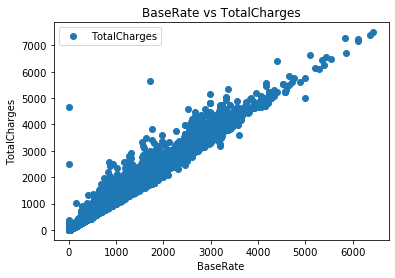

In [54]:
df4_TL.plot(x='BaseRate', y='TotalCharges', style='o')  
plt.title('BaseRate vs TotalCharges')  
plt.xlabel('BaseRate')  
plt.ylabel('TotalCharges')  
plt.show()

#### 4.1.2 Observe the overall distribution of TotalCharges

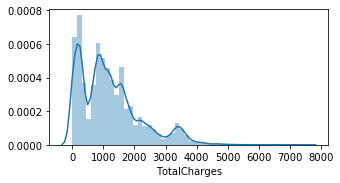

In [55]:
plt.figure(figsize=(5,2.5))
plt.tight_layout()
seabornInstance.distplot(df4_TL['TotalCharges'])

As we can observe that most of the time the value is either 200 or 1000.

In [56]:
#Previous fitting model
#plt.scatter(X_test, y_test,  color='gray')
#plt.plot(X_test, y_pred, color='red', linewidth=2)
#plt.show()

#### 4.1.3 Probably already know:TotalCharges=BaseRate+Fuel+Handling+Layover+StopCharges+OtherAccessorial(offered by Rich). So need to find better way to calculate TotalCharges. So, we need a standard by which to measure the degree of the present method, and to improve upon it.---Find a standard.

#### new find TotalCharges=BaseRate+Fuel+Handling+Layover+StopCharges+OtherAccessorial+Fuel_Fee(the Root Mean Squared Error: 0.4489011952964065 decreaced 0.02!)

In [57]:
X = df4_TL[['BaseRate','Detention','Fuel','Handling','Layover','StopCharges','OtherAccessorial','Fuel_Fee']]
y = df4_TL['TotalCharges'].values

Next, I split 80% of the data to the training set while 20% of the data to test set using below code.The test_size variable is where we actually specify the proportion of the test set.

In [58]:
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [59]:
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: 0.1466980567831797
the slope: [0.91759522 0.08795729 0.91816986 0.91770732 0.91778511 0.91762806
 0.91777436 0.08223755]


In [61]:
#in the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. 
#To see what coefficients our regression model has chosen, execute the following script:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
BaseRate,0.917595
Detention,0.087957
Fuel,0.918170
Handling,0.917707
Layover,0.917785
StopCharges,0.917628
OtherAccessorial,0.917774
Fuel_Fee,0.082238


In [62]:
### This means that for a unit increase in “BaseRate”,there is a increase of 1 unit in the Totalcharges. Similarly, others are same.
#We can see that the rest of the features have very little effect on tTotalcharges.

In [63]:
y_pred = regressor.predict(X_test)

In [64]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff1 = dff.head(25)
dff1

,Actual,Predicted
0,661.58,661.664169
1,930.65,930.631924
2,5.40,5.595339
3,1070.24,1070.158393
4,1721.71,1721.720516
5,343.95,343.962426
6,5.51,5.251071
7,658.95,658.979694
8,841.50,841.587640
9,1207.20,1207.186599


comparison of Actual and Predicted value

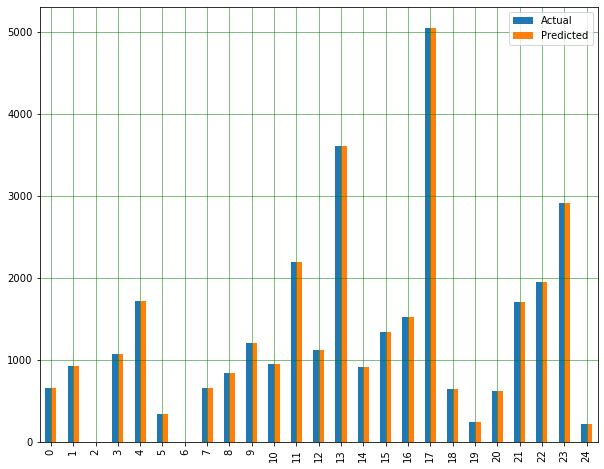

In [65]:
dff1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#We can also visualize comparison result as a bar graph using the below script :
#Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

In [66]:
from sklearn.metrics import accuracy_score, r2_score
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.9999998254420235
Mean Absolute Error: 0.15760308010153284
Mean Squared Error: 0.16808910095386995
Root Mean Squared Error: 0.4099867082648777


#### Original  model is good, the predicted percentages are close to the actual ones. Conclusion: our model should be smaller than these Es (Find a standard)

#### Up to now,TotalCharges=0.99BaseRate+Fuel+0.99Handling+Layover+0.99StopCharges+0.99OtherAccessorial+0.088Detention+0.187

#### Up to now,TotalCharges=0.99BaseRate+Fuel+0.99Handling+Layover+0.99StopCharges+0.99OtherAccessorial+0.09Fuel_Fee+0.088Detention+0.187

### 4.2 Consider the appropriate parameters

In [67]:
df4_TL=df4_TL.reset_index().drop(columns=['index'])

In [68]:
corrMatrix=df4_TL.select_dtypes(include=['float64','int64']).corr()
corrMatrix

,BaseRate,Cases,Cube,Detention,Fuel,Handling,Layover,LoadMiles,OtherAccessorial,StopCharges,TotalAccessorial,TotalCharges,Weight,Per Mile Charge,"Market Rates- DS, DAT",Transportation Factor,Frequency,year,month,Fuel_Fee
BaseRate,1.000000,0.310120,0.355674,-0.065116,0.904349,0.124680,0.047784,0.844192,0.091497,-0.012313,0.835937,0.991904,0.349266,-0.292522,0.620590,0.121532,-0.396179,-0.032770,0.003860,0.991912
Cases,0.310120,1.000000,0.696971,-0.076526,0.276160,0.040093,0.002816,0.167989,0.003573,-0.056054,0.243131,0.303884,0.550236,0.052611,0.116437,0.208407,0.087267,-0.002200,0.008745,0.303925
Cube,0.355674,0.696971,1.000000,-0.089236,0.287437,0.063535,0.008403,0.158208,-0.003409,-0.103229,0.255360,0.343088,0.458217,0.151064,0.125370,0.293556,0.086938,-0.011765,-0.001540,0.343144
Detention,-0.065116,-0.076526,-0.089236,1.000000,-0.050173,-0.017732,-0.003002,-0.044132,0.005656,-0.003510,-0.041935,-0.063003,-0.097902,0.031835,-0.030949,-0.073236,0.011473,0.006102,-0.002557,-0.063009
Fuel,0.904349,0.276160,0.287437,-0.050173,1.000000,0.033125,0.036900,0.933326,0.097927,-0.020643,0.883927,0.926635,0.279954,-0.343450,0.618554,0.052896,-0.334572,-0.052021,-0.033522,0.926594
Handling,0.124680,0.040093,0.063535,-0.017732,0.033125,1.000000,0.049117,0.013597,0.034516,-0.020011,0.390805,0.189992,0.070200,0.015031,0.045559,0.092464,-0.240959,-0.010226,0.016862,0.190013
Layover,0.047784,0.002816,0.008403,-0.003002,0.036900,0.049117,1.000000,0.037057,0.056197,0.001667,0.219111,0.088859,-0.001750,0.003749,0.025982,0.052125,-0.046428,-0.022183,0.020527,0.088879
LoadMiles,0.844192,0.167989,0.158208,-0.044132,0.933326,0.013597,0.037057,1.000000,0.092549,-0.045072,0.816983,0.863115,0.127370,-0.409559,0.669841,-0.046869,-0.383797,-0.010298,-0.009043,0.863088
OtherAccessorial,0.091497,0.003573,-0.003409,0.005656,0.097927,0.034516,0.056197,0.092549,1.000000,0.050516,0.325740,0.148419,0.027357,0.002334,0.081103,0.055298,-0.058245,-0.030670,0.012986,0.148381
StopCharges,-0.012313,-0.056054,-0.103229,-0.003510,-0.020643,-0.020011,0.001667,-0.045072,0.050516,1.000000,0.088801,0.010720,-0.119146,0.083674,-0.065995,0.134017,-0.044583,0.001678,-0.019235,0.010715


the correlation matrix for the columns with float64 or int64 data type

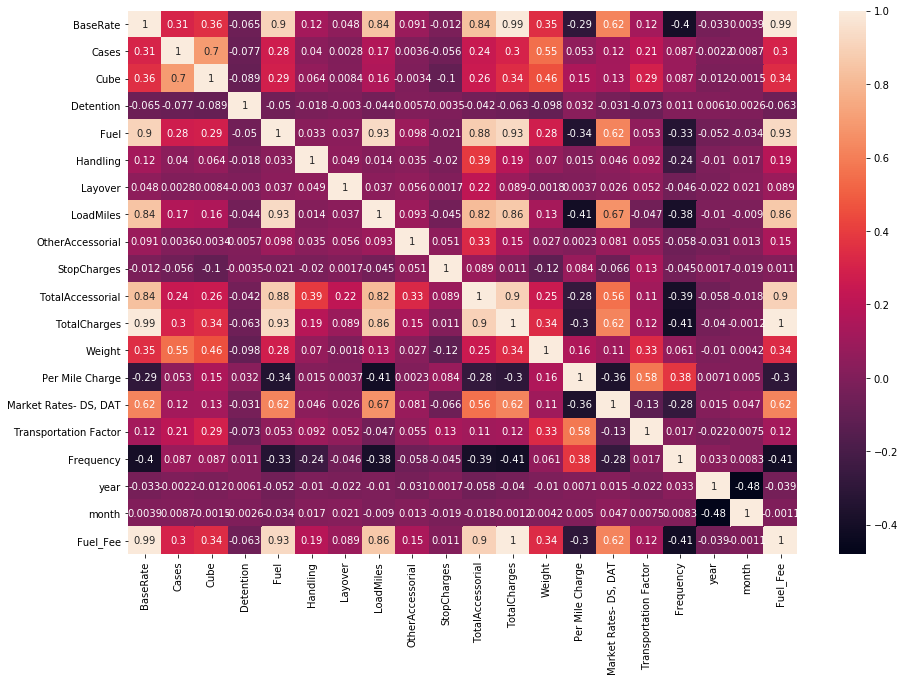

In [69]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(15, 10))
corrMatrix=df4_TL.select_dtypes(include=['float64','int64']).corr()
sn.heatmap(corrMatrix, annot=True)

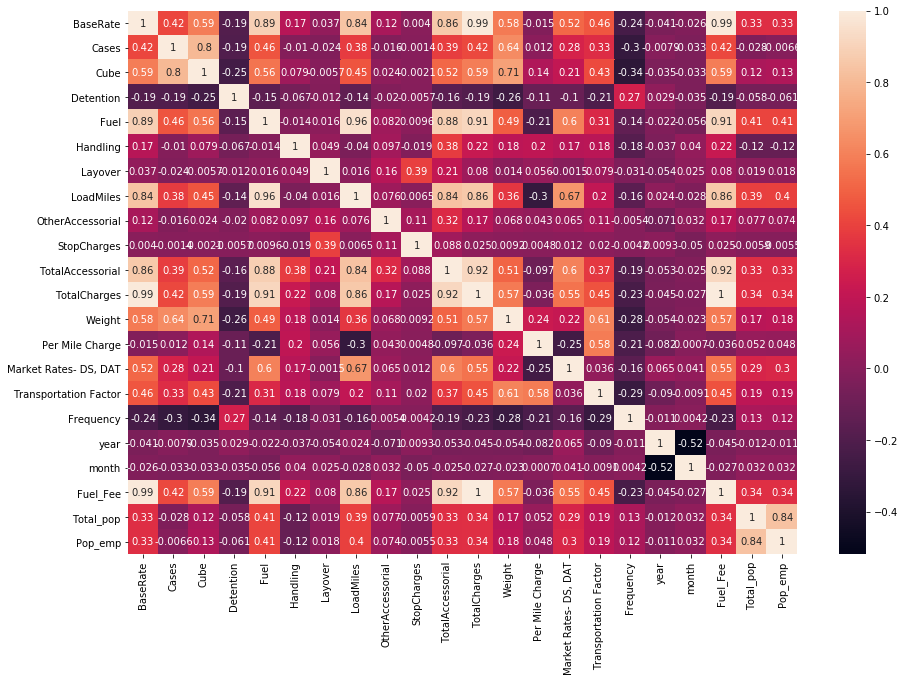

In [70]:
plt.figure(figsize=(15, 10))
corrMatrix=df4.select_dtypes(include=['float64','int64']).corr()
sn.heatmap(corrMatrix, annot=True)

conclusion:We can see that there are a number of factors that can affect BaseRate,cases, cube, fuel, loadmiles,totalaccessorial

### 4.3 The data were divided into four seasons: spring, summer, autumn and winter

In [210]:
dfa=df4_TL[(df4_TL.month==3)|(df4_TL.month==4)|(df4_TL.month==5)]

In [211]:
dfa.shape

(14414, 30)

In [212]:
dfa2=df4[(df4.month==3)|(df4.month==4)|(df4.month==5)]

In [213]:
dfa2.shape

(9759, 33)

In [214]:
dfb=df4_TL[(df4_TL.month==6)|(df4_TL.month==7)|(df4_TL.month==8)]

In [215]:
dfb.shape

(13825, 30)

In [216]:
dfb2=df4[(df4.month==6)|(df4.month==7)|(df4.month==8)]

In [217]:
dfb2.shape

(7905, 33)

In [218]:
dfc=df4_TL[(df4_TL.month==9)|(df4_TL.month==10)|(df4_TL.month==11)]

In [219]:
dfc.shape

(14434, 30)

In [220]:
dfc2=df4[(df4.month==9)|(df4.month==10)|(df4.month==11)]

In [221]:
dfc2.shape

(8093, 33)

In [222]:
dfd=df4_TL[(df4_TL.month==12)|(df4_TL.month==1)|(df4_TL.month==2)]

In [223]:
dfd.shape

(12810, 30)

In [224]:
dfd2=df4[(df4.month==12)|(df4.month==1)|(df4.month==2)]

In [225]:
dfd2.shape

(8685, 33)

### 4.4 Predict the BaseRate for each season

#### 4.4.1 Spring（3，4，5）

In [226]:
X = dfa2[['Cases','Cube','Fuel','LoadMiles','Weight','Frequency','Per Mile Charge','Total_pop','Pop_emp']]
y = dfa2['BaseRate'].values
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: 108.25093563446853
the slope: [-1.24028472e-01  7.87677888e-02  3.20162598e+00  3.51678703e-02
  8.38542315e-03 -8.28056830e-02  3.56656262e+01 -6.40236638e-02
 -7.63509985e-02]


In [227]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Cases,-0.124028
Cube,0.078768
Fuel,3.201626
LoadMiles,0.035168
Weight,0.008385
Frequency,-0.082806
Per Mile Charge,35.665626
Total_pop,-0.064024
Pop_emp,-0.076351


In [228]:
y_pred = regressor.predict(X_test)
dff=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred  })
dff1=dff.head(25)
dff1

,Actual,Predicted
0,650.00,582.787565
1,2592.46,2823.691499
2,1099.40,1219.867503
3,700.00,610.077574
4,869.20,1081.811929
5,869.20,1154.095345
6,2504.32,2138.415096
7,0.84,93.140632
8,44.96,79.340530
9,1720.00,2306.937466


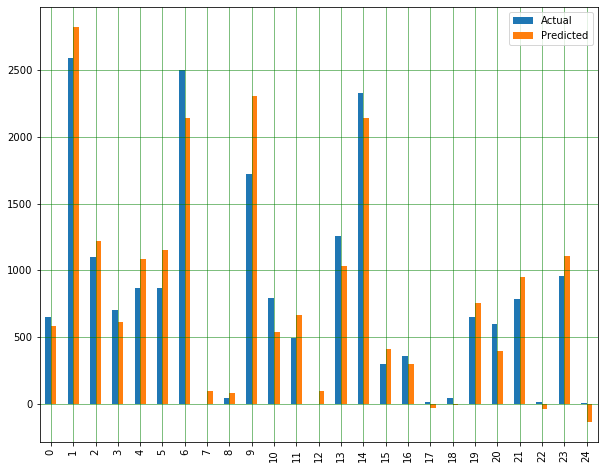

In [229]:
dff1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [230]:
y_pred = regressor.predict(X_test)
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.8847406802283853
Mean Absolute Error: 180.4814417508228
Mean Squared Error: 57573.37898552366
Root Mean Squared Error: 239.94453314364898


#### Conclusion:BaseRate=-0.04cases+0.1cube+3.18fuel-0.03LoadMiles-0.15frequency+2.23Per Mile Charge+184.5

##### Consider the Fuel

In [231]:
X = dfa[['Cases','Cube','LoadMiles','Weight','Frequency','Fuel_Fee']]
y = dfa['Fuel'].values
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: -80.56416836123549
the slope: [0.00299093 0.00383216 0.20816467 0.00075002 0.01747389 0.09783572]


In [232]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Cases,0.002991
Cube,0.003832
LoadMiles,0.208165
Weight,0.000750
Frequency,0.017474
Fuel_Fee,0.097836


In [233]:
y_pred = regressor.predict(X_test)
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.9474702631854132
Mean Absolute Error: 29.87232435801521
Mean Squared Error: 2104.644144488171
Root Mean Squared Error: 45.8764007359794


#### Conclusion:Fule=0.21LoadMiles+0.017Frequency+0.09Fuel_Fee-80.56

#### final Conclusion: Totalcharge=-0.04cases+0.1cube+0.56LoadMiles0.08frequency+0.46LoadMiles*Per Mile Charge+2.23PerMileCharge+Handling+Layover+StopCharges+OtherAccessorial+152
#### Fuel_Fee=LoadMiles*Per Mile Charge

#### Consider external factors for comparison

In [234]:
X = dfa[['BaseRate','Detention','Fuel','Handling','Layover','StopCharges','OtherAccessorial','Fuel_Fee']]
y = dfa['TotalCharges'].values
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: -0.00858844464255526
the slope: [0.99491946 0.99245067 0.99490278 0.9949145  0.99490723 0.99492336
 0.99491959 0.00508839]


In [235]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
BaseRate,0.994919
Detention,0.992451
Fuel,0.994903
Handling,0.994914
Layover,0.994907
StopCharges,0.994923
OtherAccessorial,0.994920
Fuel_Fee,0.005088


In [236]:
y_pred = regressor.predict(X_test)
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.9999999968852412
Mean Absolute Error: 0.008116283693174827
Mean Squared Error: 0.002900086904719412
Root Mean Squared Error: 0.0538524549553631


#### 4.4.2 Summer（6，7，8）

In [270]:
X = dfb[['Cases','Cube','Fuel','LoadMiles','Weight','Frequency','Per Mile Charge']]
y = dfb['BaseRate'].values
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: 129.85189694252642
the slope: [-0.0427345   0.12172733  2.84748204  0.19175305  0.00656535 -0.14709594
  2.32746484]


In [271]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Cases,-0.042735
Cube,0.121727
Fuel,2.847482
LoadMiles,0.191753
Weight,0.006565
Frequency,-0.147096
Per Mile Charge,2.327465


In [272]:
from sklearn.metrics import accuracy_score, r2_score
y_pred = regressor.predict(X_test)
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.8481409422526258
Mean Absolute Error: 215.67947802330625
Mean Squared Error: 96978.90700921594
Root Mean Squared Error: 311.41436545094695


#### Conclusion:BaseRate=-0.04cases+0.1cube+3.18fuel-0.03LoadMiles-0.15frequency+2.23Per Mile Charge+184.5

In [240]:
X = dfb[['Cases','Cube','LoadMiles','Weight','Frequency','Fuel_Fee']]
y = dfb['Fuel'].values
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: -69.18872752618549
the slope: [0.00348998 0.00193927 0.19452377 0.00062104 0.0151632  0.08930827]


In [241]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Cases,0.003490
Cube,0.001939
LoadMiles,0.194524
Weight,0.000621
Frequency,0.015163
Fuel_Fee,0.089308


In [242]:
y_pred = regressor.predict(X_test)
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.9324426718813983
Mean Absolute Error: 32.011791638082826
Mean Squared Error: 2430.535489707883
Root Mean Squared Error: 49.30046135390502


In [243]:
X = dfb[['BaseRate','Detention','Fuel','Handling','Layover','StopCharges','OtherAccessorial','Fuel_Fee']]
y = dfb['TotalCharges'].values
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: 0.1368782037513938
the slope: [0.91762702 0.03303517 0.91815733 0.91774141 0.91777018 0.91763261
 0.91765564 0.08221802]


In [244]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
BaseRate,0.917627
Detention,0.033035
Fuel,0.918157
Handling,0.917741
Layover,0.917770
StopCharges,0.917633
OtherAccessorial,0.917656
Fuel_Fee,0.082218


In [245]:
y_pred = regressor.predict(X_test)
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.9999998394755417
Mean Absolute Error: 0.14363521814561236
Mean Squared Error: 0.15845196734088754
Root Mean Squared Error: 0.3980602559172261


### 4.4.3 Fall（9,10,11）

In [246]:
X = dfc2[['Cases','Cube','Fuel','LoadMiles','Weight','Frequency','Per Mile Charge','Total_pop','Pop_emp']]
y = dfc2['BaseRate'].values
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: 35.95326823856658
the slope: [-1.05016653e-01  1.23167213e-01  2.74013814e+00  2.14986717e-01
  1.04312087e-02 -3.70677173e-02  2.97391129e+01 -3.50452315e-02
 -4.58505074e-02]


In [247]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Cases,-0.105017
Cube,0.123167
Fuel,2.740138
LoadMiles,0.214987
Weight,0.010431
Frequency,-0.037068
Per Mile Charge,29.739113
Total_pop,-0.035045
Pop_emp,-0.045851


In [248]:
y_pred = regressor.predict(X_test)
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.8834618852261849
Mean Absolute Error: 155.77755622674377
Mean Squared Error: 51625.62024970908
Root Mean Squared Error: 227.21272026387317


In [249]:
X = dfc[['Cases','Cube','LoadMiles','Weight','Frequency','Fuel_Fee']]
y = dfc['Fuel'].values
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: -58.682763225402
the slope: [0.00132269 0.00245676 0.20268993 0.00056214 0.01234827 0.06736189]


In [250]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Cases,0.001323
Cube,0.002457
LoadMiles,0.202690
Weight,0.000562
Frequency,0.012348
Fuel_Fee,0.067362


In [251]:
y_pred = regressor.predict(X_test)
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.9406554004848217
Mean Absolute Error: 23.08946242580253
Mean Squared Error: 1652.1739321000161
Root Mean Squared Error: 40.64694246926841


In [252]:
X = dfc[['BaseRate','Detention','Fuel','Handling','Layover','StopCharges','OtherAccessorial','Fuel_Fee']]
y = dfc['TotalCharges'].values
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: -0.000555746352802089
the slope: [9.99801814e-01 9.99938113e-01 9.99799873e-01 9.99801549e-01
 9.99801307e-01 9.99802084e-01 9.99801068e-01 1.98756229e-04]


In [253]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
BaseRate,0.999802
Detention,0.999938
Fuel,0.999800
Handling,0.999802
Layover,0.999801
StopCharges,0.999802
OtherAccessorial,0.999801
Fuel_Fee,0.000199


In [254]:
y_pred = regressor.predict(X_test)
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.9999999999998089
Mean Absolute Error: 0.0003215841057208946
Mean Squared Error: 1.6549852748580476e-07
Root Mean Squared Error: 0.00040681510233250286


### 4.4.4 Winter（12,1,2）

In [255]:
X = dfd2[['Cases','Cube','Fuel','LoadMiles','Weight','Frequency','Per Mile Charge','Total_pop','Pop_emp']]
y = dfd2['BaseRate'].values
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: 153.3015252572509
the slope: [-8.63462546e-02  6.59112521e-02  2.92351803e+00  1.38759984e-01
  8.09764822e-03 -1.33001518e-01  2.94565290e+01 -5.07044074e-02
 -7.77812945e-02]


In [256]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Cases,-0.086346
Cube,0.065911
Fuel,2.923518
LoadMiles,0.138760
Weight,0.008098
Frequency,-0.133002
Per Mile Charge,29.456529
Total_pop,-0.050704
Pop_emp,-0.077781


In [257]:
y_pred = regressor.predict(X_test)
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.8320977214911032
Mean Absolute Error: 232.0865347786688
Mean Squared Error: 82161.96539073758
Root Mean Squared Error: 286.6390855949997


In [258]:
X = dfd[['Cases','Cube','LoadMiles','Weight','Frequency','Fuel_Fee']]
y = dfd['Fuel'].values
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: -76.596036982372
the slope: [-0.00036385  0.00706889  0.22291372  0.00084974  0.01611731  0.07923226]


In [259]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Cases,-0.000364
Cube,0.007069
LoadMiles,0.222914
Weight,0.000850
Frequency,0.016117
Fuel_Fee,0.079232


In [260]:
y_pred = regressor.predict(X_test)
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.9477911245200481
Mean Absolute Error: 29.20430573312556
Mean Squared Error: 2148.130413807043
Root Mean Squared Error: 46.34792782646321


In [261]:
X = dfa[['BaseRate','Detention','Fuel','Handling','Layover','StopCharges','OtherAccessorial','Fuel_Fee']]
y = dfa['TotalCharges'].values
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print("the intercept:",regressor.intercept_)
#For retrieving the slope:
print("the slope:",regressor.coef_)

the intercept: -0.00858844464255526
the slope: [0.99491946 0.99245067 0.99490278 0.9949145  0.99490723 0.99492336
 0.99491959 0.00508839]


In [262]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
BaseRate,0.994919
Detention,0.992451
Fuel,0.994903
Handling,0.994914
Layover,0.994907
StopCharges,0.994923
OtherAccessorial,0.994920
Fuel_Fee,0.005088


In [263]:
y_pred = regressor.predict(X_test)
print('r squared :',r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r squared : 0.9999999968852412
Mean Absolute Error: 0.008116283693174827
Mean Squared Error: 0.002900086904719412
Root Mean Squared Error: 0.0538524549553631


### Final Conclusion
#### 1) Spring
##### TotalCharge=Detention+Handling+Layover+StopCharge+OtherAccessorial+0.015Fuel_Fee-0.12Cases+0.08Cube+0.635LoadMiles+0.010Weight-0.023Frequency+35.67Per Mile Charge-0.064Total_pop-0.076Pop_emp-149.542
#### 2) Summer
#### TotalCharge=Detention+Handling+Layover+StopCharge+OtherAccessorial+0.16Fuel_Fee-0.16Cases+0.12Cube+0.82LoadMiles+0.011Weight-0.016Frequency+46.37Per Mile Charge-0.038Total_pop-0.035Pop_emp-142.59
#### 3)Fall
#### TotalCharge=Detention+Handling+Layover+StopCharge+OtherAccessorial+0.067Fuel_Fee-0.11Cases+0.12Cube+0.61LoadMiles+0.011Weight-0.017Frequency+29.74Per Mile Charge-0.035Total_pop-0.046Pop_emp-85.52
#### 4)Winter
#### TotalCharge=Detention+Handling+Layover+StopCharge+OtherAccessorial+0.084Fuel_Fee-0.01Cases+0.11Cube+0.61LoadMiles+0.0076Weight-0.143Frequency+3.95Per Mile Charge -53.00
